In [1]:
'''USING QUANDL TO GATHER FINANCIAL DATA
    - https://www.quandl.com/tools/api'''
import quandl

'''LIBRARY NUMPY -- USED FOR MANIPULATING ARRAYS AND DATAFRAMES
   LIBRARY PANDAS -- USED FOR CSV MANIPULATION'''
import numpy as np
import pandas as pd


'''USING SKLEARN TO IMPORT MODELS AND TO TEST OUR DATA
    - LINEAR MODEL --> LINEAR REGRESSION
    - SUPPORT VECTOR MACHINE --> SUPPORT VECTOR REGRESSION
    TRAIN TEST SPLIT --> TO TRAIN AND TEST DATA'''
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split

'''LIBRARY SEABORN -- USED FOR PLOTTING'''
import seaborn as sns

from datetime import datetime



print("[SUCCESS]")

[SUCCESS]


In [3]:
'''GET THE FINANCIAL DATA STOCK -- AMAZON'''
amazon_df = quandl.get('WIKI/AMZN')
print(amazon_df.head())

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.437500   1.

In [5]:
'''ONLY NEED CLOSING PRICE -- REWRITE OUR DATAFRAME TO FIT THOSE PARAMATERS'''

amazon_df = amazon_df[['Adj. Close']]
print(amazon_df.head())

            Adj. Close
2015-01-02      308.52
2015-01-05      302.19
2015-01-06      295.29
2015-01-07      298.42
2015-01-08      300.46


Showing the amazon_df.head()
 
             Adj. Close  Stock Prediction
2015-01-02      308.52            309.66
2015-01-05      302.19            306.75
2015-01-06      295.29            303.91
2015-01-07      298.42            311.78
2015-01-08      300.46            354.53

Showing the amazon_df.tail()
 
             Adj. Close  Stock Prediction
2018-03-21     1581.86               NaN
2018-03-22     1544.10               NaN
2018-03-23     1495.56               NaN
2018-03-26     1555.86               NaN
2018-03-27     1497.05               NaN


<AxesSubplot:>

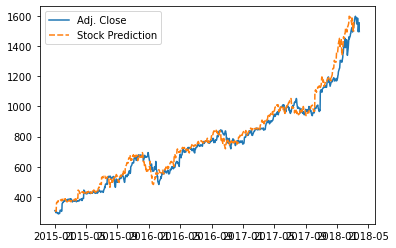

In [6]:
'''CREATE A VARIABLE TO STORE THE NUMBER OF DAYS OUT TO PREDICT
    - FOR THIS WE USE 15 DAYS
    - CAN BE CHANGED TO ANY AMOUNT'''
nday = 15 

'''SINCE WE ARE DOING A PREDICTIVE ANALYSIS, CREATE A NEW COLUMN TO STORE THE TARGET PREDICTION'''
amazon_df['Stock Prediction'] = amazon_df[['Adj. Close']].shift(-nday)

'''SHOW OUR DATAFRAME'''
print(f"Showing the amazon_df.head()\n \n {amazon_df.head()}")
print()
print(f"Showing the amazon_df.tail()\n \n {amazon_df.tail()}")
sns.lineplot(data = amazon_df)

In [7]:
'''READ CSV FILE CONTAINING AMAZON AVERAGE SENTIMENT'''
csv_data = pd.read_csv('AMZN_avg_sent.csv')
csv_data.head()

dates = []
for i in csv_data['date']:
    dates.append(datetime.strptime(i, '%m/%d/%y'))

#convert sentiment datafram to match format of main_df so they can be joined on date
dates = np.array((dates))
dates = pd.DataFrame(dates)
dates.set_index(0)
csv_data['dates'] = dates
csv_data = csv_data[['sent', 'dates']]
csv_data = csv_data.set_index('dates')
amazon_df = amazon_df.join(csv_data, how='inner')
amazon_df.head()

,Adj. Close,Stock Prediction,sent
2015-01-02,308.52,309.66,0.026933
2015-01-05,302.19,306.75,0.042016
2015-01-06,295.29,303.91,0.044505
2015-01-07,298.42,311.78,0.047204
2015-01-08,300.46,354.53,0.050522


Numpy Array 
 [[ 2.69325150e-02]
 [ 4.20156250e-02]
 [ 4.45051020e-02]
 [ 4.72044200e-02]
 [ 5.05219510e-02]
 [ 8.16377550e-02]
 [ 7.69159290e-02]
 [ 8.95793450e-02]
 [ 4.23161760e-02]
 [ 5.90736430e-02]
 [-2.32483220e-02]
 [ 8.60821920e-02]
 [ 9.29656570e-02]
 [-2.93199230e-02]
 [ 2.78515000e-04]
 [ 6.76065570e-02]
 [ 7.02532750e-02]
 [ 1.03106061e-01]
 [ 8.08785050e-02]
 [ 8.71327590e-02]
 [ 6.93197670e-02]
 [ 1.06732360e-01]
 [ 7.30512820e-02]
 [ 8.05112360e-02]
 [ 4.63294800e-02]
 [ 5.71117650e-02]
 [ 4.13779070e-02]
 [ 5.25838150e-02]
 [ 6.62102270e-02]
 [ 6.02279790e-02]
 [ 5.24000000e-02]
 [ 8.22222220e-02]
 [ 3.96517240e-02]
 [ 3.81215690e-02]
 [ 6.38484850e-02]
 [ 6.39428570e-02]
 [ 7.53574470e-02]
 [ 6.24917360e-02]
 [ 5.24576270e-02]
 [ 4.79948980e-02]
 [ 9.01635510e-02]
 [ 5.85094340e-02]
 [ 4.88705040e-02]
 [ 5.19188190e-02]
 [ 5.21050000e-02]
 [ 4.59609760e-02]
 [ 5.01235960e-02]
 [ 9.12383720e-02]
 [ 5.16066670e-02]
 [ 3.18058250e-02]
 [ 7.22211980e-02]
 [ 1.17000000e-01

<AxesSubplot:>

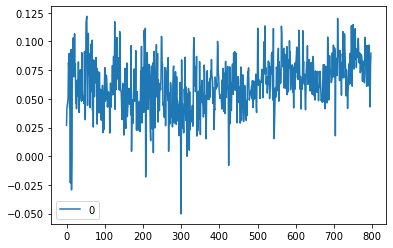

In [8]:
'''CONVERT TRAINING DATA FOR SENTIMENT ANALYSIS
    1. WILL BE REPLACING X WITH SENTIMENT
    2. WILL BE USING THE SAME Y_DATA'''
#1.
sent_data = np.array(amazon_df.drop(['Stock Prediction', 'Adj. Close'], 1))
#2.
sent_data = sent_data[:-nday]


print(f"Numpy Array \n {sent_data}")
sns.lineplot(data = sent_data)

[SUCCESS]
             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.4

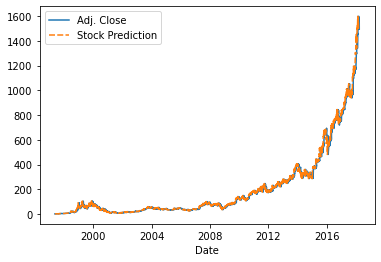

Numpy Array 
 [[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1500.25      ]
 [1523.61      ]
 [1537.64      ]]


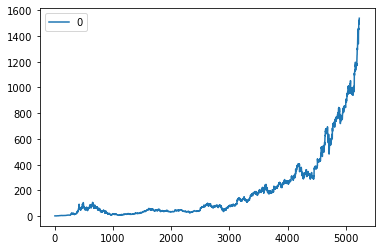

Target Data 
 [1.68750000e+00 1.58333333e+00 1.54166667e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


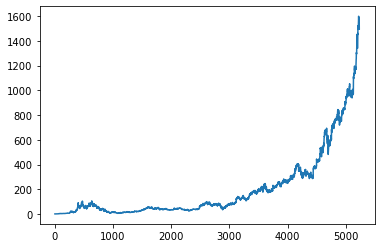

SVM (Regression)  Confidence: 0.9571293027281023
Linear Confidence: 0.9945096409915394
Since model score is so close to 1, it is better to predict the Amazon Stock price.
[[1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]
Linear Regression Model Prediction Prices -- 15 days out
Stock Price: $1592.4398362828736
Stock Price: $1599.5182117796776
Stock Price: $1627.4086621701474
Stock Price: $1647.5294088447367
Stock Price: $1636.9943922525542
Stock Price: $1639.9041617716487
Stock Price: $1630.9478499185493
Stock Price: $1619.9691450663631
Stock Price: $1592.3676079614777
Stock Price: $1635.2712308706791
Stock Price: $1630.4732066636616
Stock Price: $1591.511186436354
Stock Price: $1541.426004714068
Stock Price: $1603.6455444308756
Stock Price: $1542.9634361266392

Support Vector Machine (Regression) Prediction Prices -- 15 days out
Stock Price: $695.0485170603836
Stock Price

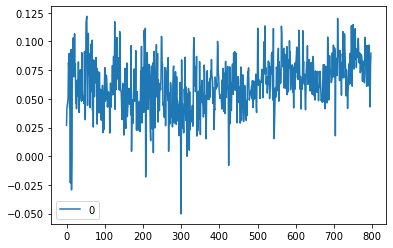

5233
797


In [11]:
%run StockPrice_prediction.ipynb

In [17]:
print(y_data)
print(len(y_data))

[1.68750000e+00 1.58333333e+00 1.54166667e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]
5233


In [26]:
new_data = []
for i in range(0, len(y_data) - 4436):
    new_data.append(i)
print(len(new_data))

797


In [27]:
'''SET UP OUR TRAIN TEST SPLIT
    - x_data, y_data --> datasets we are using
    - test_size is split to 80% training and 20% testing'''

'''TESTING DATA IS SET -- MOVE ON TO THE MODELS'''
x_train, x_test, y_train, y_test = train_test_split(sent_data, new_data, test_size = 0.2)

In [28]:
'''CREATE SUPPORT VECTOR MACHINE (REGRESSION) MODEL
    - MODEL ATTEMPTS TO PREDICT A STOCK PRICE IN THE FUTURE
    
    1. USING 3 PARAMETERS
        - KERNEL (TYPE OF MATHEMATICAL FUNCTION TO USE)
            - USING RBF FOR THIS MODEL -- RADIAL BASIS FUNCTION -- GAUSSIAN FUNCTION
            - https://scikit-learn.org/stable/modules/svm.html
            - https://www.cs.princeton.edu/sites/default/files/uploads/saahil_madge.pdf
            
        - C
            - HELPS WITH THE MISCLASSIFICATION OF TRAINING EXAMPLES
            - CHOOSING A LOW INT CREATES A SMOOTH DECISION
            - CHOOSING A HIGH INT CREATES THE CLASSIFICATION OF DATA MORE ACCURATELY
            
        - GAMMA
            - DECIDING FACTOR OF HOW MUCH INFLUENCE A SINGLE TRAINING EXAMPLE HAS
            
        - USED THE FOLLOWING TO CORRECTLY CHOOSE A PROPER C AND GAMMA VALUES
            - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
        
    2. THEN REFIT THE DATA WITH THE SVM MACHINE USING .fit()
        - .fit(1, 2)
            - 1 --> TRAINING VECTOR WHERE N SAMPLES IS THE NUMBER OF SAMPLES
            - 2 --> TARGET IS RELATIVE TO X FOR REGRESSION
            
    '''

#1
svr_machine = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)

#2
svr_machine.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [29]:
'''GET THE SCORE OF THE SVM MODEL -- REGRESSION
    1. SCORE Returns the coefficient of determination R^2 of the prediction.
        - BEST POSSIBLE SCORE IS 1.0 -- CAN BE NEGATIVE
        - .score(1, 2) PARAMETERS
            - 1 --> TRAINING VECTOR WHERE N SAMPLES IS THE NUMBER OF SAMPLES
            - 2 --> TARGET IS RELATIVE TO X FOR REGRESSION'''


#1
SVM_score = svr_machine.score(x_test, y_test)


print(f"SVM (Regression)  Confidence: {SVM_score}")

SVM (Regression)  Confidence: 0.040910386990694936


In [30]:
'''1. CREATE LINEAR REGRESSION MODEL
   2. TRAIN MODEL'''

#1
lnr = LinearRegression()

#2
lnr.fit(x_train, y_train)

LinearRegression()

In [31]:
'''GET THE SCORE OF THE LINEAR REGRESSION MODEL
        1. SCORE Returns the coefficient of determination R^2 of the prediction.
        - BEST POSSIBLE SCORE IS 1.0 -- CAN BE NEGATIVE
        - .score(1, 2) PARAMETERS
            - 1 --> TRAINING VECTOR WHERE N SAMPLES IS THE NUMBER OF SAMPLES
            - 2 --> TARGET IS RELATIVE TO X FOR REGRESSION'''

#1
lnr_confidence = lnr.score(x_test, y_test)



print(f"Linear Confidence: {lnr_confidence}")
print('Since model score is so close to 1, it is better to predict the Amazon Stock price.')

Linear Confidence: 0.10321478340082713
Since model score is so close to 1, it is better to predict the Amazon Stock price.


In [33]:
'''MODELS ARE TRAINED AND TESTED -- TIME FOR PREDICTIONS

    1. CREATE A NEW NUMPY ARRAY BY DROPPING THE STOCK PREDICTION AND ADDING IN OUR N DAYS OUT FROM THE BEGINNING
    2. PRED
        - DATA TO BE USED TO MAKE PREDICTIONS

    '''
#1
pred = np.array(amazon_df.drop(['Stock Prediction', 'sent'], 1))[-nday:]




print(pred)

[[1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]


In [35]:
'''PRINT PREDICTIONS FOR BOTH MODELS USING .predict()
    - THIS WILL PERFORM CLASSIFICATION ON SAMPLES IN OUR X_DATA'''
print('Stock Predictions with Sentiment Analysis')
'''LINEAR REGRESSION PREDICTION'''
lnr_prediction = lnr.predict(pred)
print('Linear Regression Model Prediction Prices -- 15 days out')
for i in lnr_prediction:
    print(f"Stock Price: ${i}")
print()

'''SUPPORT VECTOR MACHINE PREDICTION'''
SVM_prediction = svr_machine.predict(pred)
print('Support Vector Machine (Regression) Prediction Prices -- 15 days out')
for i in SVM_prediction:
    print(f"Stock Price: ${i}")



Stock Predictions with Sentiment Analysis
Linear Regression Model Prediction Prices -- 15 days out
Stock Price: $4435430.264094118
Stock Price: $4455123.189665997
Stock Price: $4532717.909521382
Stock Price: $4588696.342269439
Stock Price: $4559386.609020328
Stock Price: $4567481.951602355
Stock Price: $4542564.372307322
Stock Price: $4512020.2428488955
Stock Price: $4435229.315873996
Stock Price: $4554592.558626007
Stock Price: $4541243.855432239
Stock Price: $4432846.64412113
Stock Price: $4293503.406911352
Stock Price: $4466605.945101497
Stock Price: $4297780.733311075

Support Vector Machine (Regression) Prediction Prices -- 15 days out
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.69006695747373
Stock Price: $393.690